In [2]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Data Preparation and Cleaning 

Load the file using Pandas
Look at some information about the data and the columns 
Fix any missing data or incorrect values 

Note: Contains data about 49 cities, no New York 

In [3]:
df = pd.read_csv('US_Accidents_Dec20_Updated.csv')

In [4]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [7]:
numerics = ['int64', 'float64']
newdf = df.select_dtypes(include = numerics)
len(newdf.columns)

14

In [8]:
missing_percentages = df.isna().sum().sort_values(ascending= False) / len(df)
missing_percentages 

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

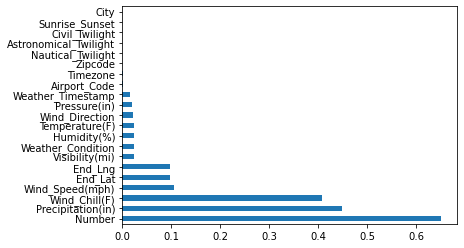

In [9]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [ ]:
#Remove columns you don't want to use 

# Exploratory Analysis 

Pick and choose which columns you want to work with
1. City 
2. Start Time 
3. Start Lat and Long 
4. Temperature 
5. Visibility 
6. Weather Condition 
7. Wind Speed 

In [10]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
cities= df.City.unique()
len(cities)

11790

In [12]:
cities_by_accident = df.City.value_counts() 
cities_by_accident[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

In [13]:
'New York' in df.City

False

In [14]:
'NY' in df.State

False

In [15]:
df.State.nunique()

49

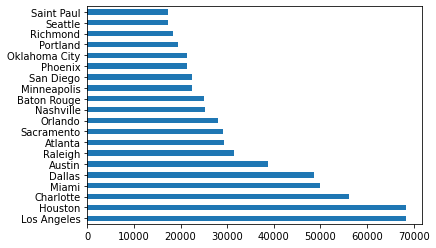

In [16]:
cities_by_accident[:20].plot(kind='barh')

In [17]:
sns.set_style("darkgrid")

In [18]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [19]:
len(high_accident_cities) *100  / len(cities)

4.351145038167939

## Insights 

No New York 
Less than 5% cities have more than a thousand accidents 

c:\users\rasika\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


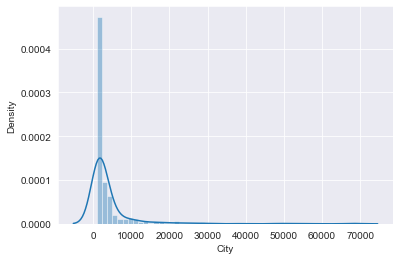

In [20]:
sns.distplot(high_accident_cities)

c:\users\rasika\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


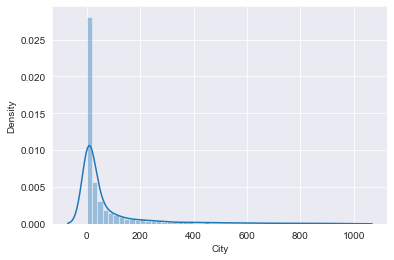

In [21]:
sns.distplot(low_accident_cities)

In [ ]:
# Decreasing numbers
# Exponentially decreaseing kind of graph 
# Number of accidents in cities follows some exponential pattern 

# However, we can see that there is a high frequency for 0 accidents or 1 accident. 
# That number is kinda useless for us, so we're gonna remove it 

In [24]:
cities_by_accident[cities_by_accident <= 10 ]

Madeline Plains    10
Reedsburg          10
Happy Jack         10
Correctionville    10
Bon Aqua           10
                   ..
Edwall              1
Shubuta             1
Cattaraugus         1
Jewell Ridge        1
Seney               1
Name: City, Length: 5005, dtype: int64

#### Start Time 


In [25]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

Format: YYYY/MM/DD Time in hr:min:ss

In [26]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [27]:
df['Hour'] = df.Start_Time.dt.hour
df['Year'] = df.Start_Time.dt.year
df['Month'] = df.Start_Time.dt.month

c:\users\rasika\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


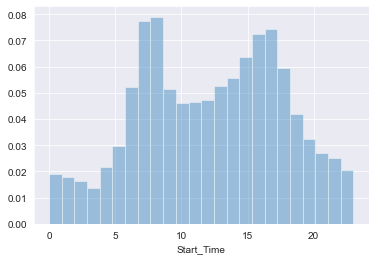

In [28]:
sns.distplot(df.Start_Time.dt.hour, norm_hist= True, kde= False, bins =24)

##### As we can see here, the maximum number of accidents take place around 7 or 8(nearly 80%) in the morning and then at 4 or 5(slightly higher than 70% ) in the afternoon 

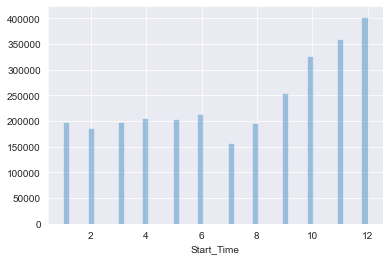

In [29]:
sns.distplot(df.Start_Time.dt.month, hist=True, kde= False)

##### As expected, December has the most amount of accidents. ( Check for visibility during that period and temperature, it will explain the high amount of accidents) 

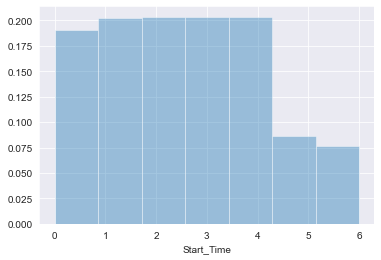

In [30]:
sns.distplot(df.Start_Time.dt.dayofweek, bins= 7, kde=False, norm_hist= True)

Cleary the weekdays have more number of accidents 

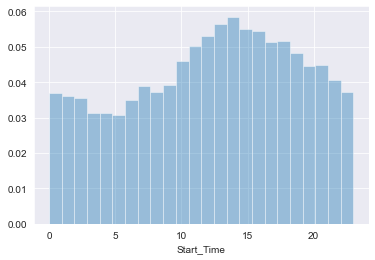

In [31]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday_start_time.dt.hour, bins=24, kde=False, norm_hist= True)

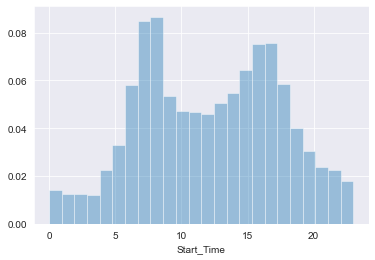

In [32]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist = True)

We can observe that on Sundays, the accidents are higher at around 11, so late morning. But on a weekday like Monday, the accidents are higher at around 8am or 4pm, likely when traffic is high as people go to and leave from work as well as school timings. 


Let us check if Friday night( Happy Hour) is reflected in this data 

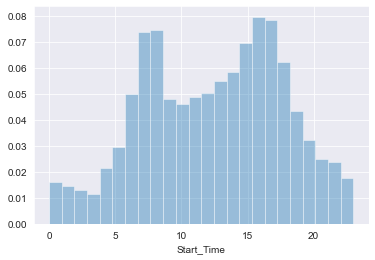

In [33]:
friday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 4]
sns.distplot(friday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

Though the accidents past 8 pm are not many, the accidents at 4pm, 5pm and 6pm (80%) are as much as the accidents at 8 am. While in the Monday graph, the evening accidents were lower( around 70%) 

In [34]:
df_2019 = df[df.Start_Time.dt.year == 2019]

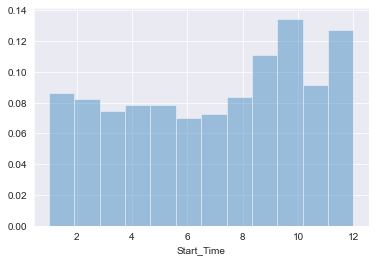

In [36]:
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist= True)

In [37]:
df_2018 = df[df.Start_Time.dt.year == 2018]
df_2017 = df[df.Start_Time.dt.year == 2017]
df_2016 = df[df.Start_Time.dt.year == 2016]

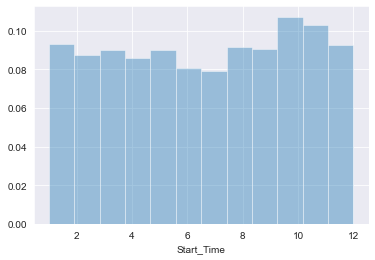

In [38]:
sns.distplot(df_2018.Start_Time.dt.month, bins=12, kde=False, norm_hist= True)

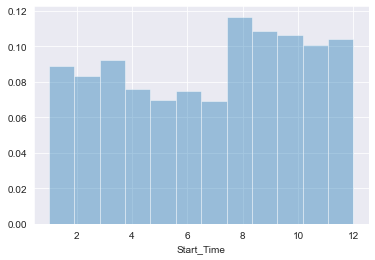

In [39]:
sns.distplot(df_2017.Start_Time.dt.month, bins=12, kde=False, norm_hist= True)

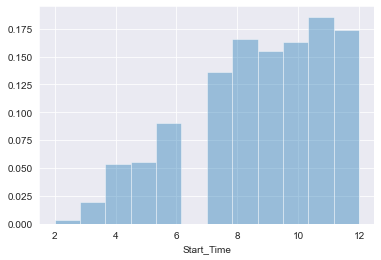

In [40]:
sns.distplot(df_2016.Start_Time.dt.month, bins=12, kde=False, norm_hist= True)

Though in the overall graph, winter months had significantly greater number of accidents, in 2019 and 2018 the number of accidents is fairly distributed. However, we can see that in 2017 and 2016 there seems to be missing data which could be a contributor to why the number of accidents in december is so high. 

## Start Latitude and Longitude 

In [42]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [44]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

In [45]:
sample_df = df.sample(int(0.1 * len(df)))

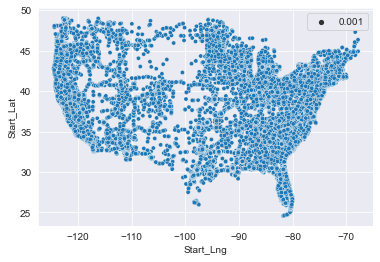

In [46]:
sns.scatterplot(x=sample_df.Start_Lng, y= sample_df.Start_Lat, size=0.001)

In [47]:
import folium

In [ ]:
# No dataframes, only list of lat long pairs 

In [48]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(34.808868, -82.26915699999998)

In [49]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems(): 
    print(x[1])

368366     47.081959
1338263    37.478306
1463168    38.641431
1012994    34.067650
2632365    34.068614
             ...    
1275288    44.915950
2766881    43.051071
577992     26.431198
2224265    34.023258
1911293    44.958447
Name: Start_Lat, Length: 100, dtype: float64
368366    -122.187775
1338263    -77.471992
1463168   -121.461405
1012994   -117.571870
2632365   -118.216742
              ...    
1275288   -123.228490
2766881    -83.635780
577992     -81.810669
2224265   -117.769913
1911293    -93.090988
Name: Start_Lng, Length: 100, dtype: float64


In [50]:
zip(list(df.Start_Lat), list(df.Start_Lng)) 

In [51]:
from folium.plugins import HeatMap

In [58]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [59]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

# The Questioning Cell 
1. Which States had highest number of accidents? 
2. Is there a difference betweent the severity of the top 5 states? 
3. Were there more accidents during colder seasons? 
4. Was visibility a factor? 
5. What about humidity and windspeed 

In [60]:
df.Severity


0          2
1          2
2          2
3          2
4          3
          ..
2906605    2
2906606    2
2906607    2
2906608    2
2906609    2
Name: Severity, Length: 2906610, dtype: int64

In [73]:
State_Severity = df.groupby(['State']).Severity.sum()

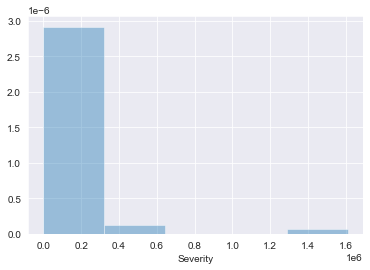

In [76]:
sns.distplot(State_Severity, bins=5, kde=False, norm_hist=True)